## Employee Performance Analysis and Enhancement at INX Future Inc

# Problem Statement:
INX Future Inc., a leading data analytics and automation solutions provider, is experiencing declining employee performance, which is impacting service delivery and client satisfaction levels. Despite being recognized as one of the top 20 best employers for the past five years, recent performance issues have raised concerns among the company's top management. This project seeks to identify the underlying factors contributing to this decline and to find solutions that can improve overall employee performance without negatively affecting employee morale.

# Project Objectives:
1. Departmental Performance Analysis: Assess and compare performance across different departments to identify areas with significant performance issues.
2. Key Factors Identification: Determine the top three most influential factors affecting employee performance, based on data analysis.
3. Predictive Model Development and Comparison: Develop and compare the performance of a RandomForestClassifier and an XGBoost model, chosen for their robustness and ability to handle complex data, to predict employee performance. The comparison will identify the best model for supporting future hiring decisions.
4. Recommendations: Provide actionable recommendations to the management of INX Future Inc. for improving employee performance based on the insights derived from the analysis and model comparisons.

# Goal of Project:
The rationale behind this project is to equip INX Future Inc.'s management with data-driven insights to address the declining employee performance. By understanding the core issues, the company can make informed decisions that not only improve performance but also maintain or even enhance employee morale. This will help INX Future Inc. to sustain its reputation as a top employer, ensure high client satisfaction, and remain competitive in the industry. The predictive model will further aid in hiring the right talent, ensuring long-term organizational success.

The RandomForestClassifier and XGBoost models have been selected for their ability to handle complex, structured data, provide insights into feature importance, manage imbalanced datasets, and deliver high predictive performance. These models are well-suited for predicting employee performance, allowing the analysis to be both accurate and interpretable. By comparing these models, the project will identify the most effective approach for predicting employee performance, ultimately aiding in better hiring and management decisions.




1. IMPORT LIBRARIES

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier




import warnings
warnings.filterwarnings('ignore')

**Comment**

- Pandas is used for efficient data manipulation and analysis through its powerful DataFrame structure.

- Numpy is crucial for performing efficient numerical computations and handling large datasets.

- Matplotlib is used for creating diverse and high-quality visualizations of your data.

- Seaborn enhances data visualization by simplifying the creation of attractive and informative statistical graphics.

- The warnings module is used to suppress non-critical warnings, ensuring a cleaner and more focused output.

2. DATA LOADING AND EXPLORATION

In [2]:
# load data
df = pd.read_excel('/content/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8 (1).xls')
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [3]:
df.info() # check for missing values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [4]:
df.isnull().sum()

,0
EmpNumber,0
Age,0
Gender,0
EducationBackground,0
MaritalStatus,0
EmpDepartment,0
EmpJobRole,0
BusinessTravelFrequency,0
DistanceFromHome,0
EmpEducationLevel,0


In [5]:
# check for duplicates
df.duplicated().sum()

0

In [6]:
# check for unique values
df.nunique()

,0
EmpNumber,1200
Age,43
Gender,2
EducationBackground,6
MaritalStatus,3
EmpDepartment,6
EmpJobRole,19
BusinessTravelFrequency,3
DistanceFromHome,29
EmpEducationLevel,5


Observations:

The dataset contains various attributes related to employee demographics, job roles, and performance metrics, as follows:

- EmpNumber: Unique identifier for each employee.
Age, Gender, EducationBackground, MaritalStatus: Personal information about employees.
- EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome: Job-related details.
- EmpEducationLevel, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance: Information about education, experience, and training.
- ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager: Tenure and role-specific experience.
- Attrition, PerformanceRating: Employee retention and performance ratings.

The attributes are contained in 28 columns with 1,200 entries. The dataset has no missing values and no duplicates

3. EXPLORATORY DATA ANALYSIS

In [7]:
# summary statistics
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


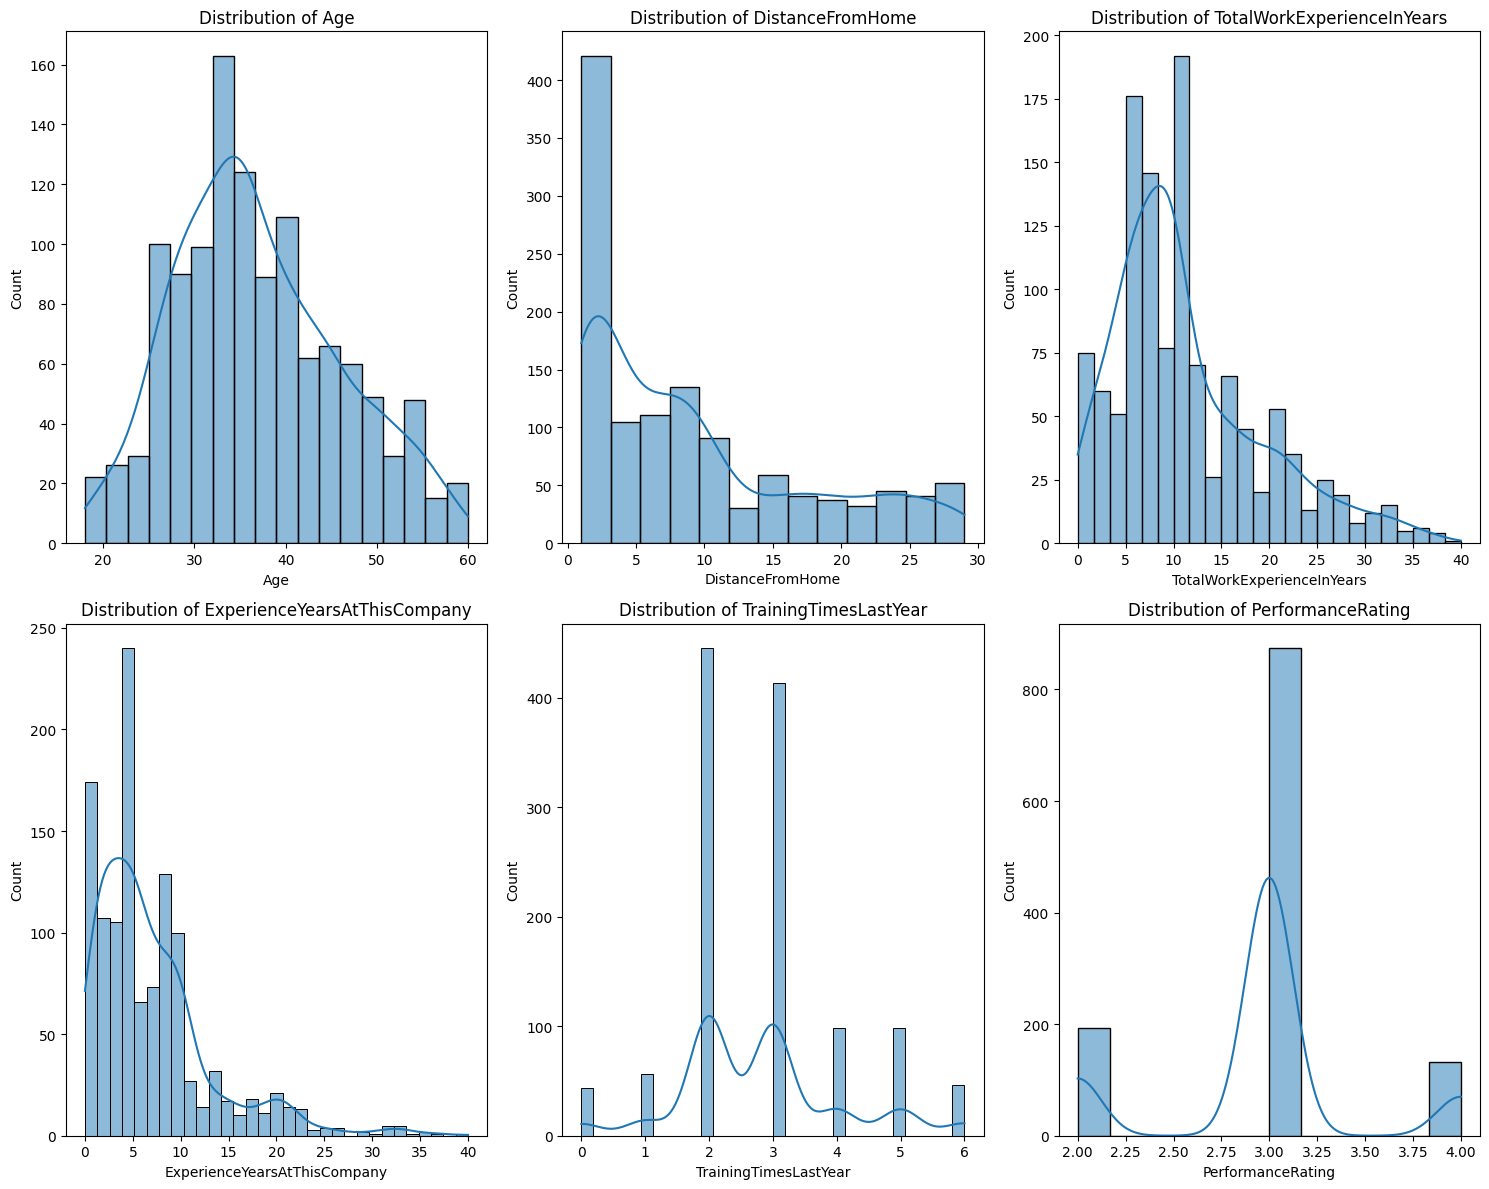

In [8]:
# distribution of numerical features

# Set up the plot for distribution analysis
plt.figure(figsize=(15, 12))

# Select key numerical features for distribution analysis
key_numerical_features = [
    'Age', 'DistanceFromHome', 'TotalWorkExperienceInYears',
    'ExperienceYearsAtThisCompany', 'TrainingTimesLastYear', 'PerformanceRating'
]

# Plot histograms for the selected numerical features
for i, feature in enumerate(key_numerical_features, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')

# Display the plots
plt.tight_layout()
plt.show()

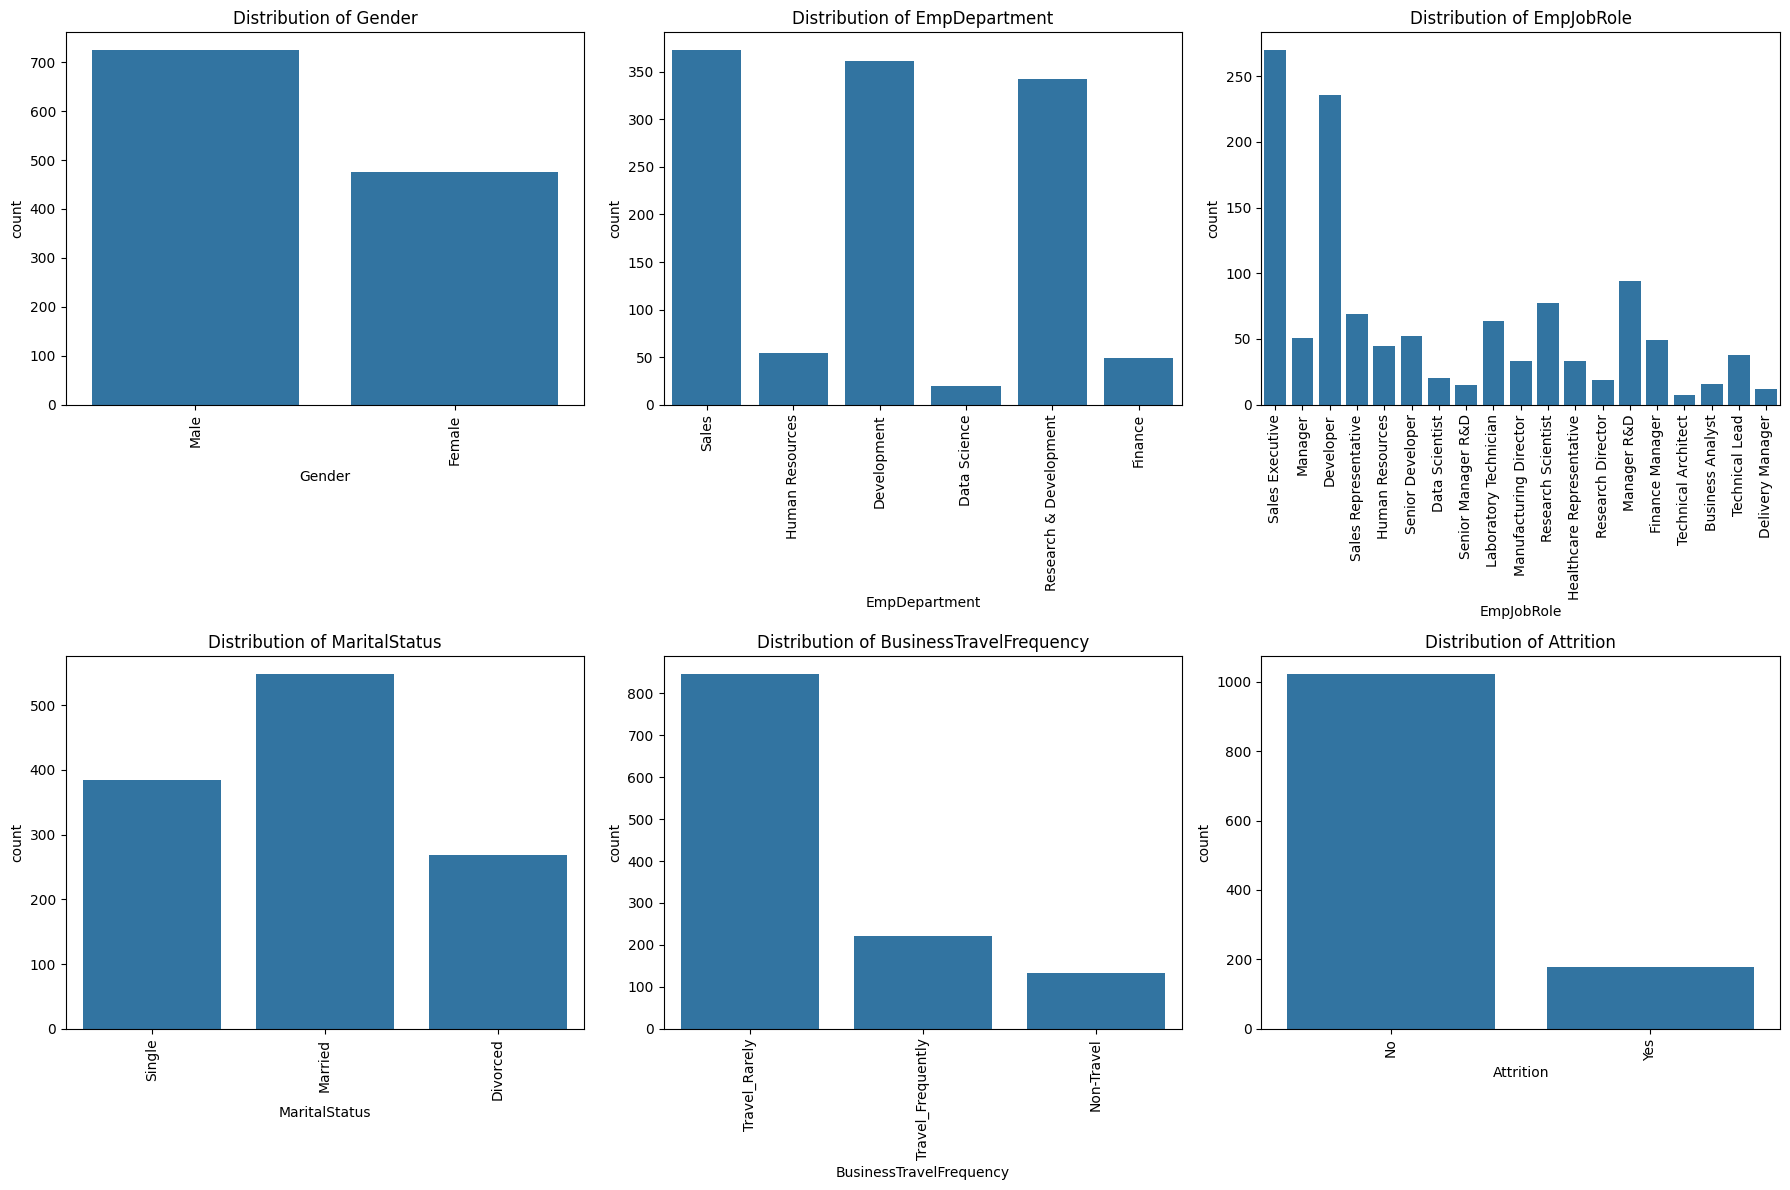

In [9]:
# distribution of categorical features

# Set up the plot for categorical feature analysis
plt.figure(figsize=(18, 12))

# Select key categorical features for analysis
categorical_features = ['Gender', 'EmpDepartment', 'EmpJobRole', 'MaritalStatus', 'BusinessTravelFrequency', 'Attrition']

# Plot count plots for the selected categorical features
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns
    sns.countplot(x=df[feature])
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=90)

# Display the plots
plt.tight_layout()
plt.show()

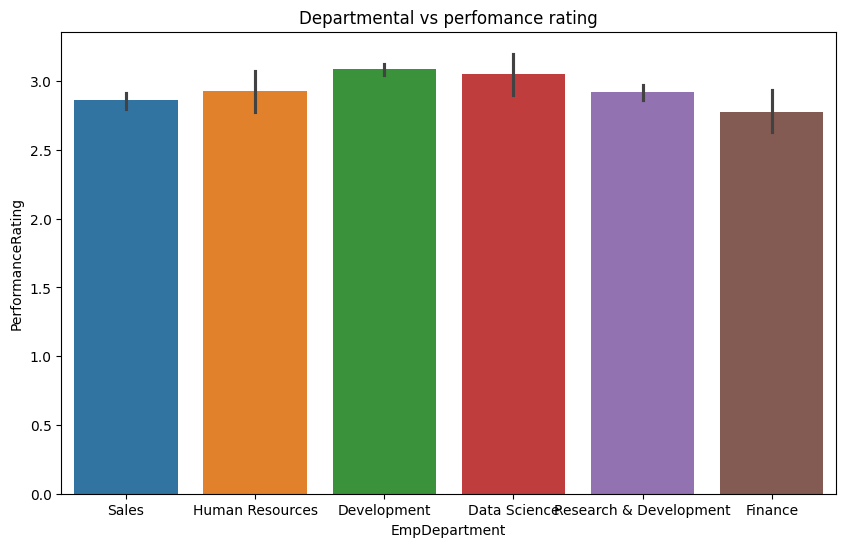

In [10]:
# Performance Ratings Across Different Departments
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="EmpDepartment", y="PerformanceRating", hue="EmpDepartment")
plt.title("Departmental vs perfomance rating")
plt.xlabel("EmpDepartment")
plt.ylabel("PerformanceRating")
plt.show()

**Comment**

- The average performance ratings of personnel in the organization's various departments are displayed in a bar plot. The graph indicates a general consistency in performance evaluations across all divisions of the organisation, with the majority of departments having average performance ratings that are similar and hover around 3.0. There are, nevertheless, a few minor differences: departments such as Development and Research & Development have slightly better average scores than departments like Sales and Finance. This distribution shows that some departments may have slightly better performance outcomes even though the organization's performance standards may be the same. By examining these differences, one can gain knowledge about the efficiency of the department, how resources are allocated, and where performance might be improved.

Text(0.8194444444444446, 0.5, 'Performance Rating')

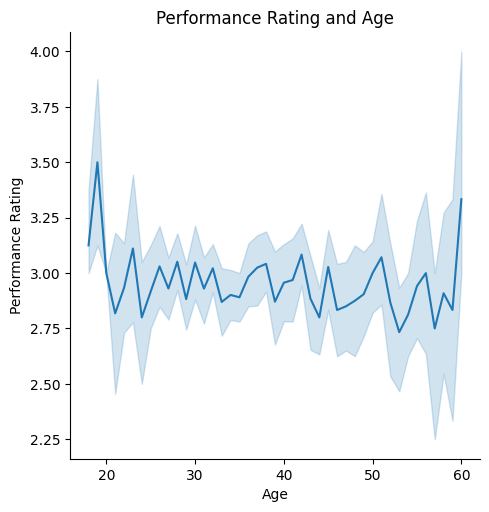

In [11]:
# perfomance rating and age
sns.relplot(
    data=df, kind="line",
    x="Age", y="PerformanceRating",
    # hue="region",  # Uncomment if you have a 'region' column and want to use it for grouping
    # units="subject", estimator=None,  # Adjust these parameters as needed
)
plt.title("Performance Rating and Age")
plt.xlabel("Age")
plt.ylabel("Performance Rating")

**Comment**

- The graph shows the relationship between age and performance rating, with the performance rating fluctuating between approximately 2.25 and 4.0. Initially, individuals in their early 20s show higher variability in performance ratings, but as age increases, the variability decreases and stabilizes around a rating of 3.0. This trend remains relatively consistent for most of the age range, with slight fluctuations. Notably, there are some increases in variability in performance ratings at the higher age brackets, particularly as individuals approach 60 years old. Overall, while there are variations, the average performance rating hovers around 3.0 across different ages.

Text(0, 0.5, 'PerformanceRating')

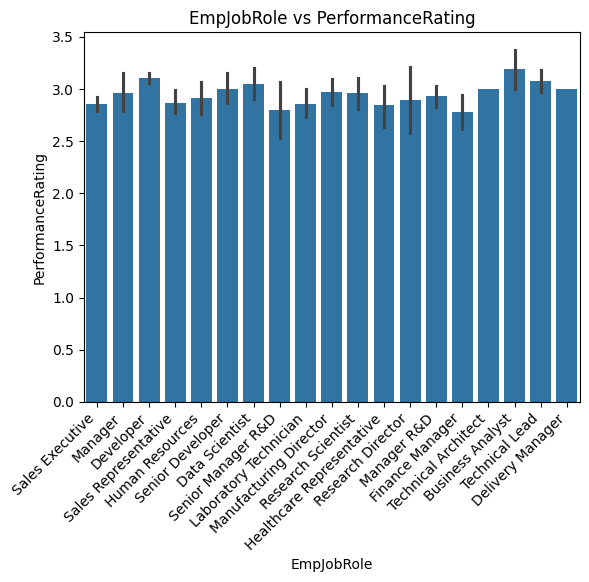

In [12]:
# Barplot EmpJobRole vs PerformanceRating
sns.barplot(data=df, x="EmpJobRole", y="PerformanceRating")
plt.xticks(rotation=45,ha="right")
plt.title("EmpJobRole vs PerformanceRating")
plt.xlabel("EmpJobRole")
plt.ylabel("PerformanceRating")

**Comment**

- Shows the average performance scores for the different positions held by members of the organisation. Every bar signifies a distinct work role, and the bar's height corresponds to the role's average performance rating. The graph indicates that, with a few minor exceptions, performance ratings are generally constant for the majority of occupational roles. It's possible that different job demands or performance standards are reflected in the roles with higher or lower average ratings. The x-axis labels are rotated for easier reading, and the code makes use of Seaborn's barplot function to ensure that the comparison of performance ratings across various job roles is understandable and instructive.

<Figure size 800x600 with 0 Axes>

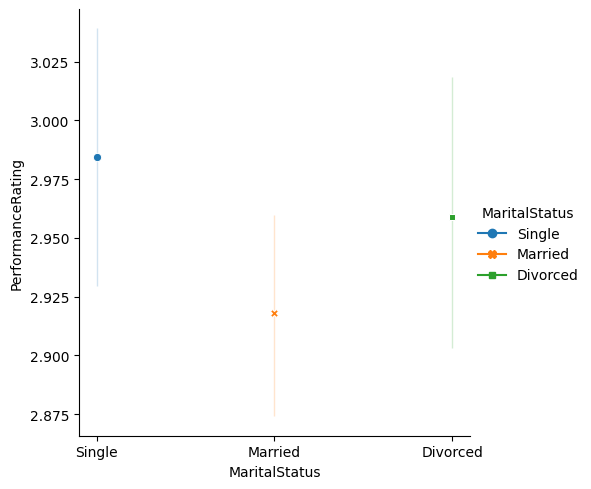

In [13]:
# Relatioship between MaritalStatus vs PerformanceRating
plt.figure(figsize=(8, 6))
sns.relplot(
    data=df, kind="line",
    x="MaritalStatus", y="PerformanceRating",
    hue="MaritalStatus",
    style="MaritalStatus",
    markers=True,
    dashes=False)

**Comment**

- The chart demonstrates the differences in performance ratings between the three marital statuses of single, married, and divorced. The average performance rating for each person in each marital status category is shown by each point on the chart; error bars show variability. Given that "Single" employees have a little higher average rating than "Married" and "Divorced" employees, the plot implies that there are not much variances in performance ratings based on marital status. The code clearly separates the marital status groups using Seaborn's relplot function with markers and several styles. This graphic shows that performance ratings are not much impacted by a person's marital status.

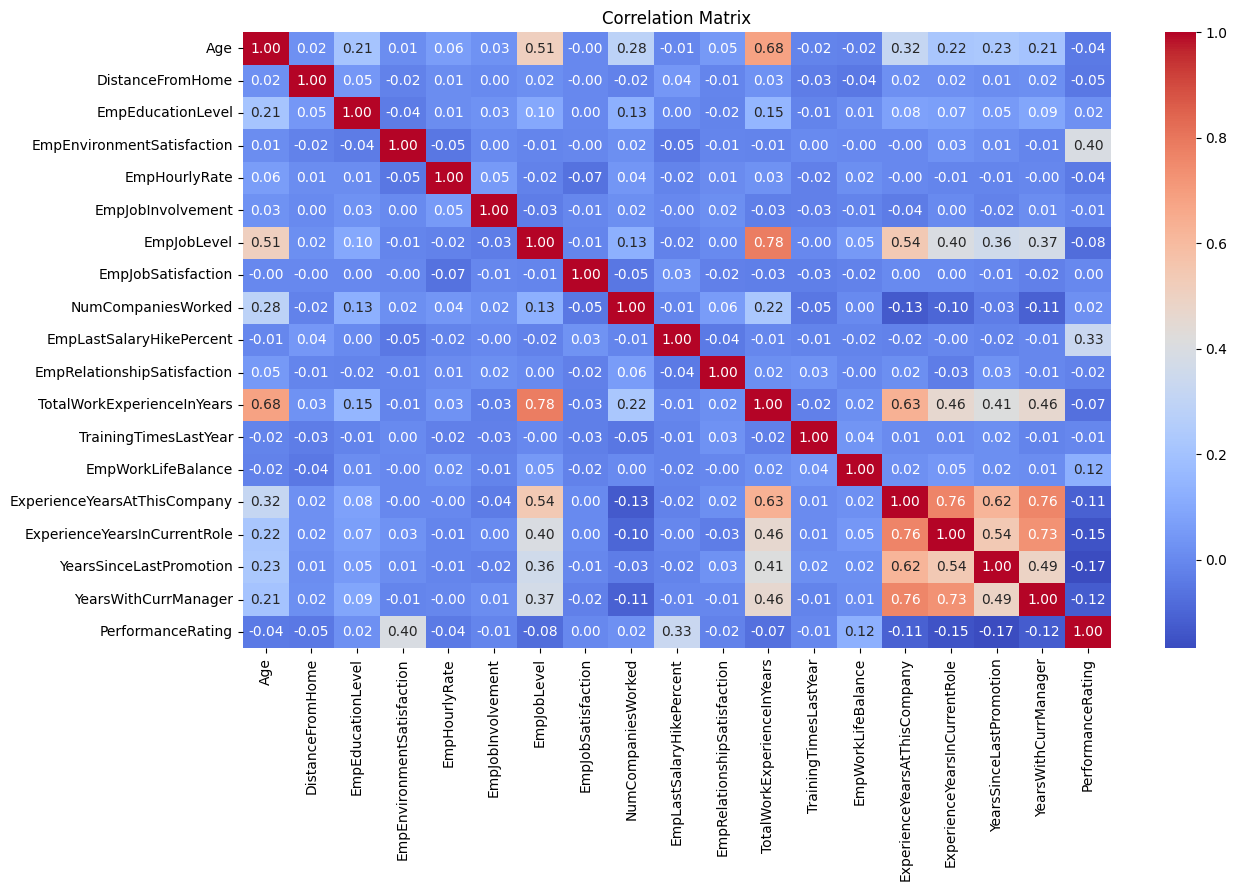

In [14]:
# correlation matrix

# Remove non-numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation = numeric_df.corr()

# visualize the correlation matrix
plt.figure(figsize=(14, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


OBSERVATIONS:

Some observations based on the distribution of the selected columns:

Age:

- The average age of employees is approximately 37 years, with a standard deviation of around 9 years.
- The youngest employee is 18 years old, and the oldest is 60 years old.
- The age distribution is relatively spread out, with 50% of the employees aged between 30 and 43 years.

Distance From Home:

- On average, employees live about 9.17 units of distance from their workplace, with a standard deviation of about 8.18 units.
- The distance ranges from 1 to 29 units, indicating a wide variance in how far employees live from work.
- The majority of employees live within 2 to 14 units of distance from work.

Total Work Experience in Years:

- The average total work experience is around 11.33 years, with a significant variation as indicated by the standard deviation of 7.80 years.
- Some employees have no work experience (0 years), while others have as much as 40 years of experience.
- Most employees have between 6 and 15 years of work experience.

Experience Years at This Company:

- Employees have an average of 7.08 years of experience at this company, with a standard deviation of 6.24 years.
- The minimum experience at the company is 0 years, and the maximum is 40 years, suggesting that some employees are new hires while others have been with the company for a very long time.
- Half of the employees have between 3 and 10 years of experience at the company.

Training Times Last Year:

- On average, employees underwent training approximately 2.79 times last year, with a standard deviation of 1.26.
- The number of training sessions ranges from 0 to 6, indicating variability in how often employees receive training.
- Most employees attended 2 to 3 training sessions last year.

Performance Rating:

- The average performance rating is around 2.95, with a standard deviation of 0.52.
- The ratings range from 2 to 4, indicating that no employees have the lowest or highest possible ratings(assuming that the lowest and highest scores are 1 and 5 respectively)
- The majority of employees received a performance rating of 3.


The correlation analysis give us an initial understanding revealing some key insights into the factors affecting employee performance as follows:

1. EmpEnvironmentSatisfaction (0.40): Employees who are more satisfied with their work environment tend to have higher performance ratings.
2. EmpLastSalaryHikePercent (0.33): Employees who received a higher percentage salary hike are generally performing better.
3. EmpWorkLifeBalance (0.12): A better work-life balance is associated with higher performance, although the correlation is weaker.

Some factors have a negative correlation with performance, indicating they might be associated with lower performance ratings:

1. YearsSinceLastPromotion (-0.17): Employees who have not been promoted in a long time might be less motivated, leading to lower performance.
2. ExperienceYearsInCurrentRole (-0.15): Staying too long in the same role without advancement might negatively impact performance.
3. YearsWithCurrManager (-0.12): Extended time with the same manager could also be associated with lower performance.

4. DEPARTMENT WISE PERFORMANCE

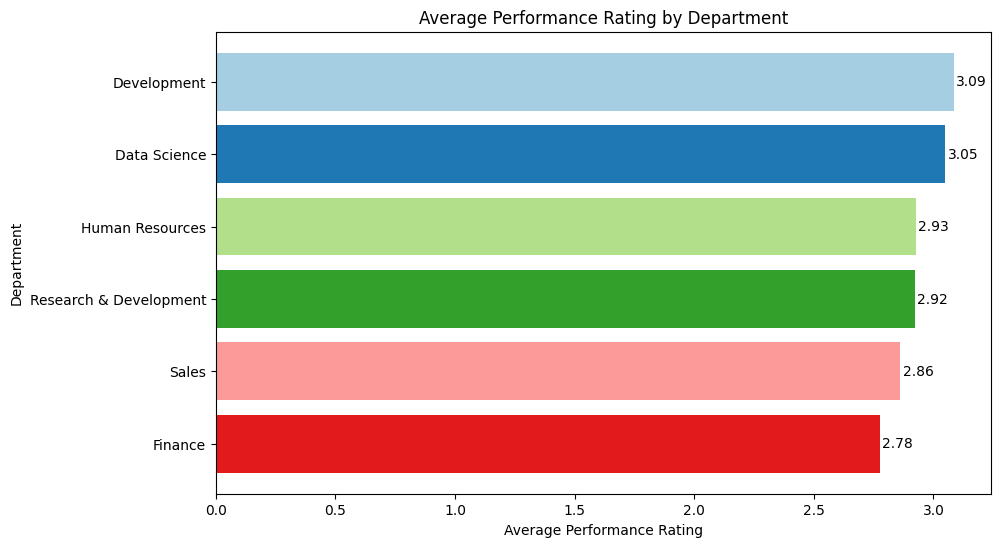

In [15]:
# Grouping the data by department and calculating the average performance rating for each department
department_performance = df.groupby('EmpDepartment')['PerformanceRating'].mean().reset_index()

# Renaming the columns for clarity
department_performance.columns = ['Department', 'AveragePerformanceRating']

# Sorting the results by performance rating for better visualization
department_performance = department_performance.sort_values(by='AveragePerformanceRating', ascending=False)

# Plotting the average performance rating for each department with different colors for each department
plt.figure(figsize=(10, 6))
colors = plt.cm.Paired(range(len(department_performance)))  # Using a colormap for different colors
bars = plt.barh(department_performance['Department'], department_performance['AveragePerformanceRating'], color=colors)

# Adding the figures on the bars
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}', va='center', fontsize=10)

plt.xlabel('Average Performance Rating')
plt.ylabel('Department')
plt.title('Average Performance Rating by Department')
plt.gca().invert_yaxis()  # To have the highest rating at the top
plt.show()

OBSERVATION:

There is no significant variability in performance across departments with development department having the highest average performance rating of 3.09 and the finance department having the lowest average performance rating.

Marital Status Analysis with other features

In [16]:
df['MaritalStatus'].value_counts()

,count
MaritalStatus,
Married,548
Single,384
Divorced,268


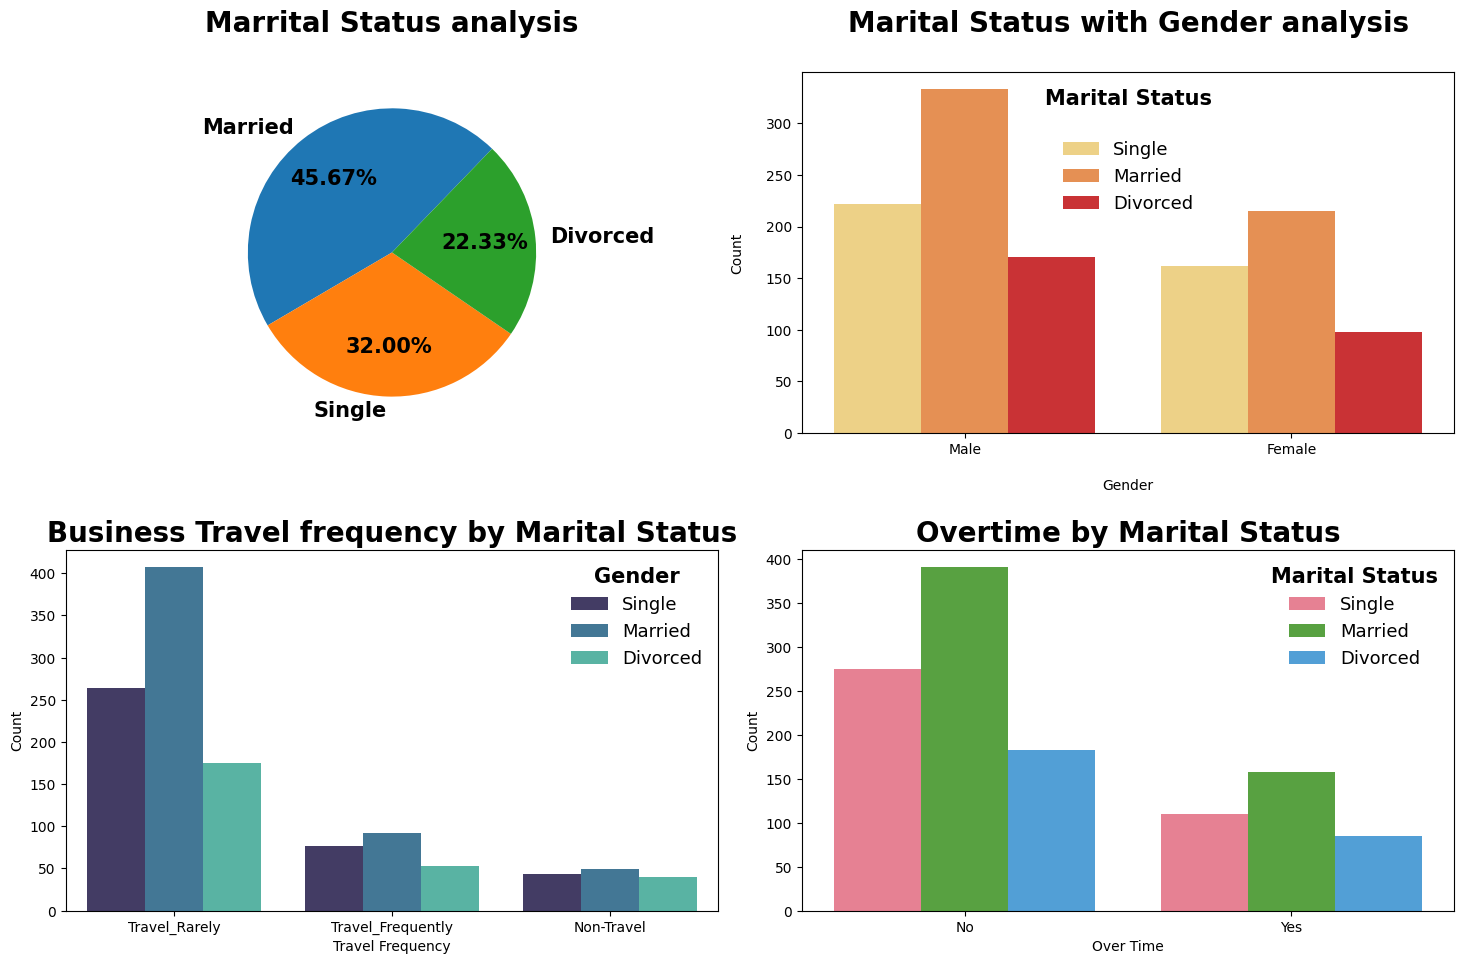

In [17]:
#pie chart for Marital Status analysis
plt.figure(figsize = (15,10))
percent_1=[]
for i in df['MaritalStatus'].value_counts():
    percent_1.append(i)

plt.subplot(2,2,1)
plt.pie(percent_1,labels=["Married","Single","Divorced"],
        explode = [0,0,0], autopct = "%0.2f%%", startangle =46,
        pctdistance = 0.65,textprops = {"fontsize":15,"fontweight":"bold",'color':"k"},
        rotatelabels=False)
        #colors = color)
plt.title("Marrital Status analysis\n",fontsize=20,fontweight='bold')

#countplot for Gender vs Marital Status
plt.subplot(2,2,2)
ax = sns.countplot(x=df['Gender'],hue= df["MaritalStatus"],palette="YlOrRd")
plt.title("Marital Status with Gender analysis\n",fontweight="bold",fontsize=20)
plt.xlabel("\nGender")
plt.ylabel("Count\n")
legend = plt.legend(prop={"size":13})
legend.set_title("Marital Status\n",prop={"size":15,"weight":"bold"})
plt.setp(legend.get_texts(), color='black')
legend.draw_frame(False)


#countplot for Marital status vs Travel Frequency
plt.subplot(2,2,3)
ax = sns.countplot(x= df['BusinessTravelFrequency'],hue=df['MaritalStatus'],palette="mako")
plt.title("Business Travel frequency by Marital Status",fontweight="bold",fontsize=20)
plt.xlabel("Travel Frequency")
plt.ylabel("Count")
legend = plt.legend(prop={"size":13})
legend.set_title("Gender",prop={"size":15,"weight":"bold"})
plt.setp(legend.get_texts(), color='black')
legend.draw_frame(False)

plt.tight_layout(pad=2)

#Countplot for Marital Status vs Overtime
plt.subplot(2,2,4)
ax = sns.countplot(x= df['OverTime'],hue=df['MaritalStatus'],palette="husl")
plt.title("Overtime by Marital Status",fontweight="bold",fontsize=20)
plt.xlabel("Over Time")
plt.ylabel("Count")
legend = plt.legend(prop={"size":13})
legend.set_title("Marital Status",prop={"size":15,"weight":"bold"})
plt.setp(legend.get_texts(), color='black')
legend.draw_frame(False)

plt.tight_layout(pad=2)


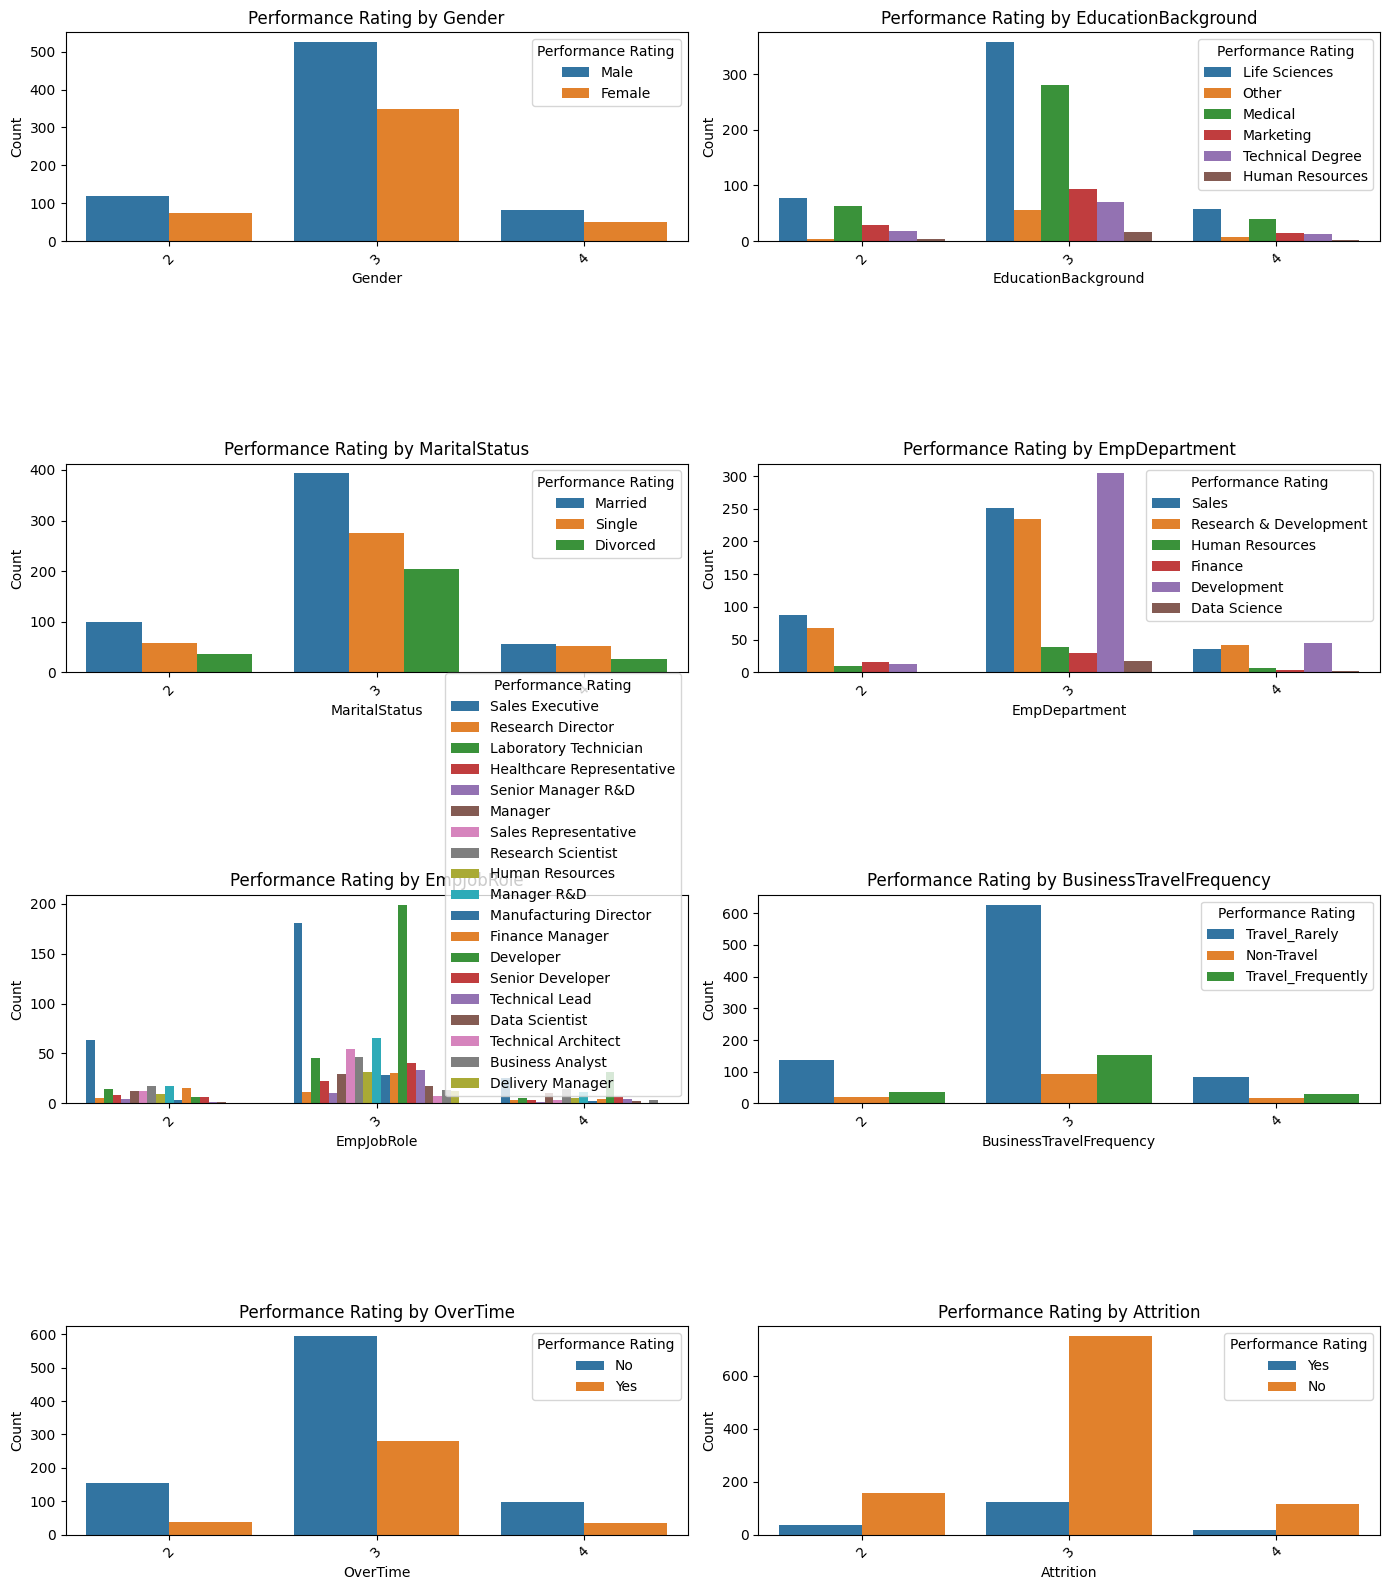

In [18]:
# Performance Rating Across Categorical Variables
categorical_columns = ['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment',
                       'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']

# Set up the plotting area for subplots
plt.figure(figsize=(14, 16))

# Loop through the categorical columns and create a count plot for each
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 2, i)
    sns.countplot(hue=column, x='PerformanceRating', data=df, palette='tab10')
    plt.title(f'Performance Rating by {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Performance Rating')

plt.tight_layout()
plt.show()

**Comment**

- By looking at which count plots in the series have the most diverse distributions, you may determine which categorical variables from the count plots exhibit the most noticeable variations in performance ratings. In particular, the variables that frequently show the most obvious variations in the distribution of performance ratings across their categories are EmpDepartment, EmpJobRole, and Attrition. Employees who have left the company (attrition) may have a distinct pattern in their performance ratings when compared to those who stayed, and various departments or job types may have considerably different counts of high or low performance ratings. According to the visual analysis the plots provide, these variables probably have the biggest effects on performance evaluations or the strongest relationships with them.

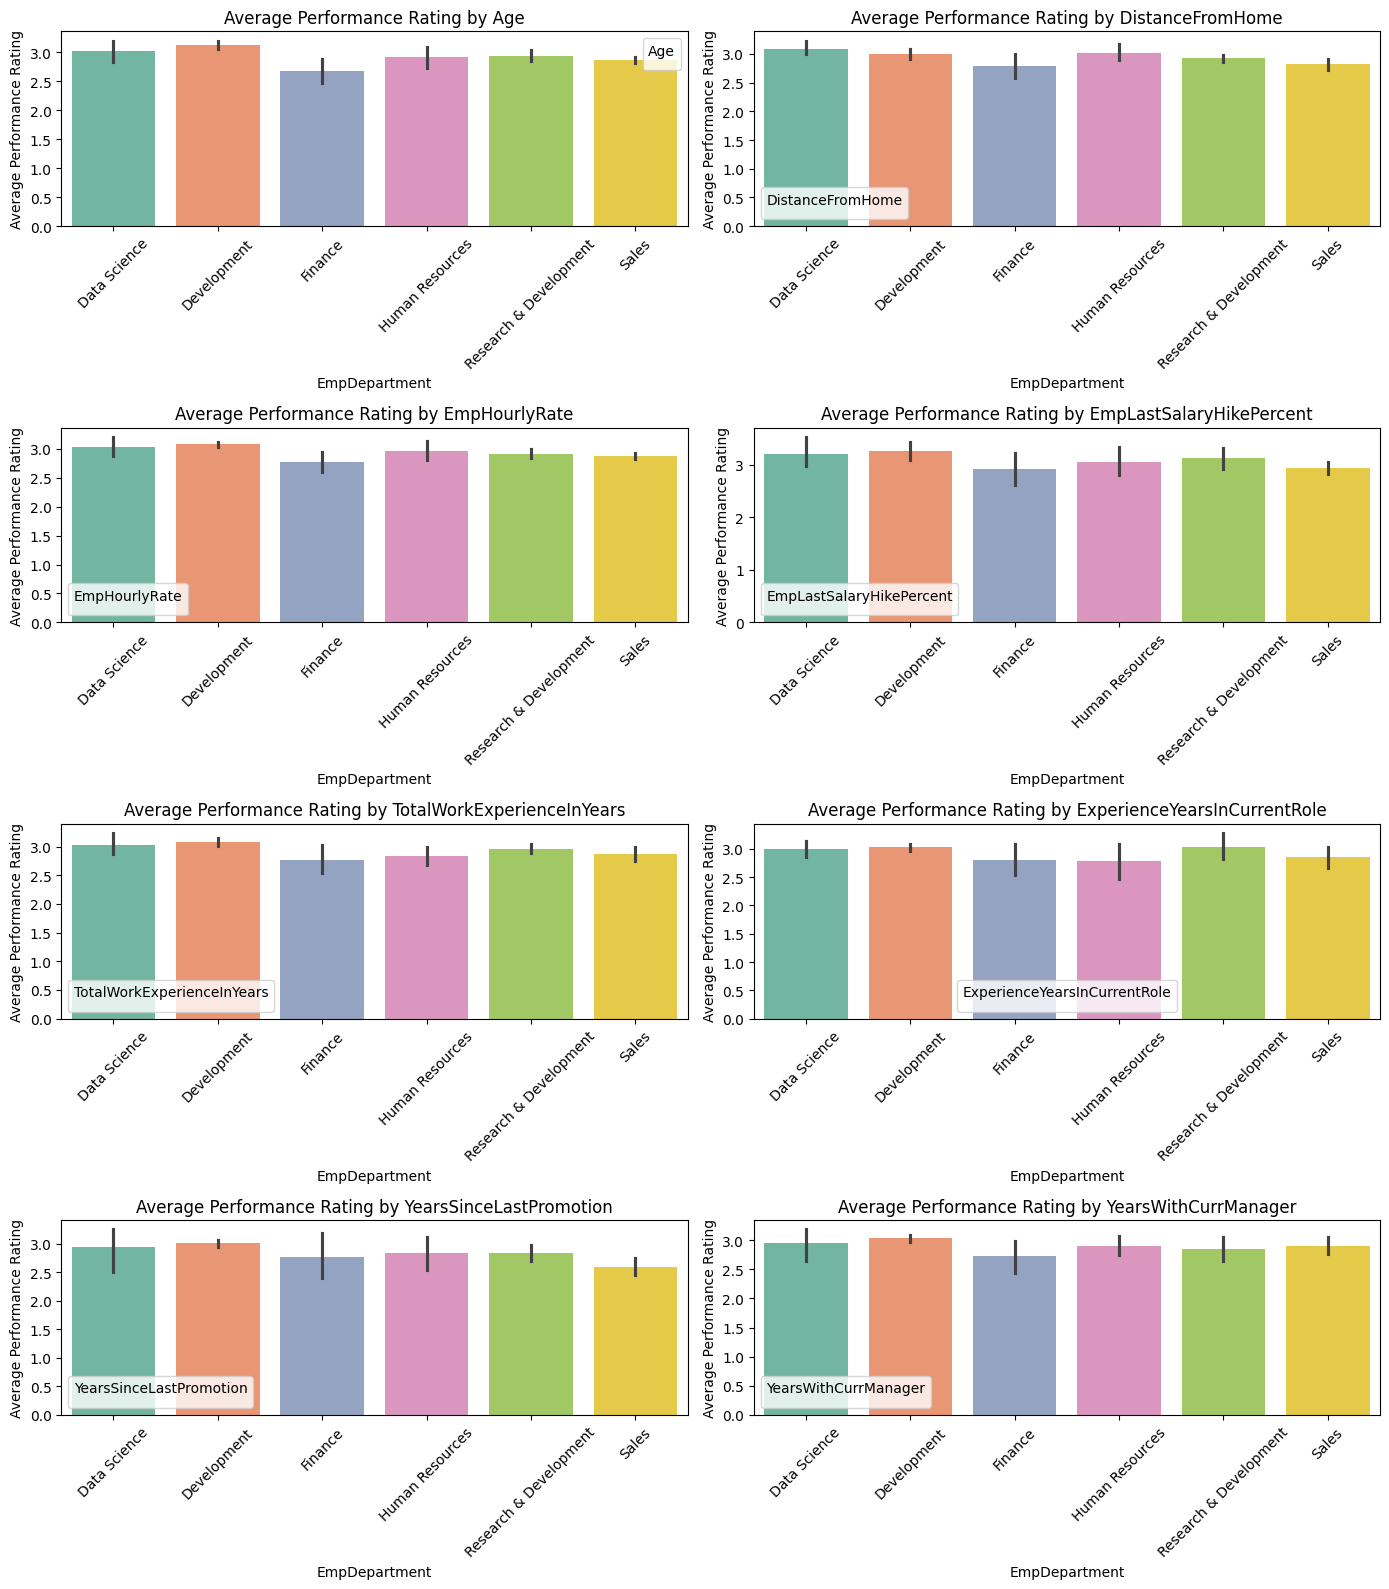

In [19]:
# Average Performance Rating by EmpDepartment and Selected Variables
columns_analyze = ['Age', 'DistanceFromHome', 'EmpHourlyRate', 'EmpLastSalaryHikePercent',
                   'TotalWorkExperienceInYears', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Set up the plotting area for subplots
plt.figure(figsize=(14, 16))

# Loop through the columns to analyze and create a bar plot for each
for i, column in enumerate(columns_analyze, 1):
    plt.subplot(4, 2, i)

    # Create a barplot showing ave
# Create a barplot showing average performance rating per department for each selected column
    avg_performance = df.groupby(['EmpDepartment', column])['PerformanceRating'].mean().reset_index()

    # Plot
    sns.barplot(x='EmpDepartment', y='PerformanceRating', data=avg_performance, palette="Set2")
    plt.title(f'Average Performance Rating by {column}')
    plt.xlabel('EmpDepartment')
    plt.ylabel('Average Performance Rating')
    plt.xticks(rotation=45)
    plt.legend(title=column)

plt.tight_layout()
plt.show()

**Comment**

- The average performance rating across departments is displayed in a series of bar plots that were created taking into account a number of variables, including age, home distance, hourly rate, percentage of last salary increase, total work experience, years in the current role, years since the last promotion, and years with the current manager. The data reveals that the departments with the biggest range in average performance evaluations are those with YearsWithCurrManager, YearsSinceLastPromotion, and TotalWorkExperienceInYears. These factors seem to have the biggest effects on how employees are ranked in various areas, indicating that managerial relationships and experience could be important factors in employee performance evaluations.

5. DATA PREPROCESSING

In [20]:
# Drop columns that are not necessary or might not be relevant to prediction
df_processed = df.drop(['EmpNumber','Attrition'], axis=1)

# Encoding categorical variables
categorical_cols = df_processed.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le

# Define features and target variable
X = df_processed.drop('PerformanceRating', axis=1)
y = df_processed['PerformanceRating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


6. MODEL BUILDING,TRAINING AND EVALUATION

In [21]:
# Building a RandomForestClassifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicting performance on the test set
y_pred = model.predict(X_test)

# Evaluating the model
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Getting feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(classification_rep, conf_matrix, feature_importances)


              precision    recall  f1-score   support

           2       0.96      0.86      0.91        29
           3       0.94      0.99      0.97       184
           4       0.95      0.74      0.83        27

    accuracy                           0.95       240
   macro avg       0.95      0.86      0.90       240
weighted avg       0.95      0.95      0.94       240
 [[ 25   4   0]
 [  1 182   1]
 [  0   7  20]]                          Feature  Importance
9     EmpEnvironmentSatisfaction    0.215138
16      EmpLastSalaryHikePercent    0.212594
23       YearsSinceLastPromotion    0.096485
5                     EmpJobRole    0.047864
22  ExperienceYearsInCurrentRole    0.039379
4                  EmpDepartment    0.038511
10                 EmpHourlyRate    0.036764
21  ExperienceYearsAtThisCompany    0.031723
0                            Age    0.030073
20            EmpWorkLifeBalance    0.026409
7               DistanceFromHome    0.026008
24          YearsWithCurrManager 

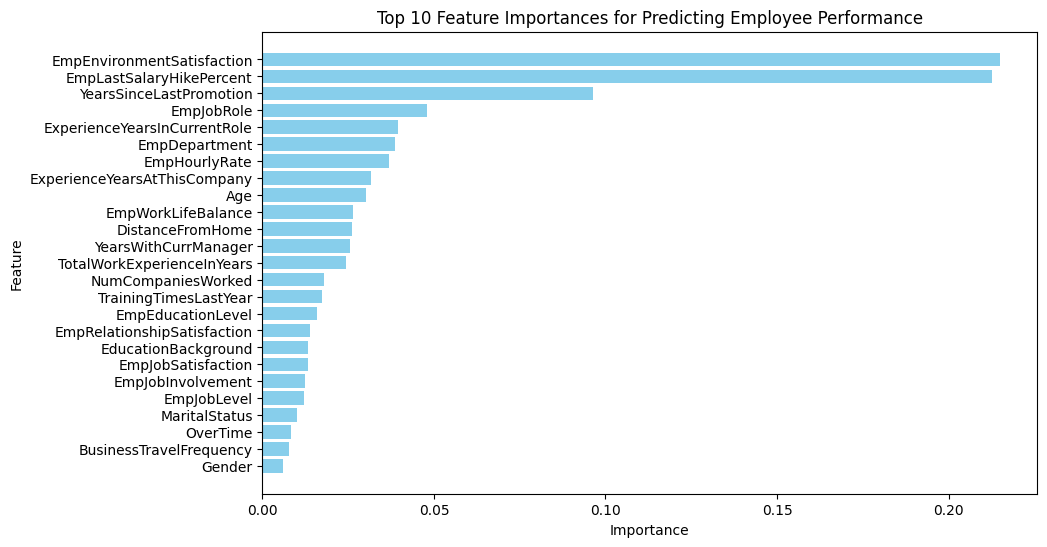

In [22]:
# Visualizing the top feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'][:], feature_importances['Importance'][:], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances for Predicting Employee Performance')
plt.gca().invert_yaxis()  # To have the most important feature at the top
plt.show()

In [23]:
# Initialize the RandomForestClassifier fine-tuned model
rf_classifier = RandomForestClassifier(random_state=42)

# Set up the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Train the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Accuracy: 0.9458333333333333
Confusion Matrix:
[[ 26   3   0]
 [  3 181   0]
 [  0   7  20]]
Classification Report:
              precision    recall  f1-score   support

           2       0.90      0.90      0.90        29
           3       0.95      0.98      0.97       184
           4       1.00      0.74      0.85        27

    accuracy                           0.95       240
   macro avg       0.95      0.87      0.90       240
weighted avg       0.95      0.95      0.94       240



In [24]:
# Initialize and train the XGBoost model

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_conf_matrix = confusion_matrix(y_test, y_pred_xgb)
xgb_report = classification_report(y_test, y_pred_xgb)

print(xgb_accuracy)
print(xgb_conf_matrix)
print(xgb_report)

0.9375
[[ 24   5   0]
 [  3 181   0]
 [  0   7  20]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.94      0.98      0.96       184
           2       1.00      0.74      0.85        27

    accuracy                           0.94       240
   macro avg       0.94      0.85      0.89       240
weighted avg       0.94      0.94      0.94       240



In [25]:
# COMPARING THE TWO MODELS
# Random Forest
print('Random Forest Classifier:')
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# XGBoost
print('XGBoost Classifier:')
print(f'Accuracy: {xgb_accuracy}')
print('Confusion Matrix:')
print(xgb_conf_matrix)
print('Classification Report:')
print(xgb_report)

Random Forest Classifier:
Accuracy: 0.9458333333333333
Confusion Matrix:
[[ 26   3   0]
 [  3 181   0]
 [  0   7  20]]
Classification Report:
              precision    recall  f1-score   support

           2       0.90      0.90      0.90        29
           3       0.95      0.98      0.97       184
           4       1.00      0.74      0.85        27

    accuracy                           0.95       240
   macro avg       0.95      0.87      0.90       240
weighted avg       0.95      0.95      0.94       240

XGBoost Classifier:
Accuracy: 0.9375
Confusion Matrix:
[[ 24   5   0]
 [  3 181   0]
 [  0   7  20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.94      0.98      0.96       184
           2       1.00      0.74      0.85        27

    accuracy                           0.94       240
   macro avg       0.94      0.85      0.89       240
weighted avg       0.94    

In [27]:
from sklearn.tree import DecisionTreeClassifier

# Building a DecisionTreeClassifier model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicting performance on the test set
y_pred = model.predict(X_test)

# Evaluating the model
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Getting feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(classification_rep, conf_matrix, feature_importances)

              precision    recall  f1-score   support

           0       0.92      0.76      0.83        29
           1       0.93      0.93      0.93       184
           2       0.61      0.74      0.67        27

    accuracy                           0.89       240
   macro avg       0.82      0.81      0.81       240
weighted avg       0.90      0.89      0.89       240
 [[ 22   5   2]
 [  2 171  11]
 [  0   7  20]]                          Feature  Importance
9     EmpEnvironmentSatisfaction    0.237268
16      EmpLastSalaryHikePercent    0.210237
23       YearsSinceLastPromotion    0.164590
4                  EmpDepartment    0.087809
20            EmpWorkLifeBalance    0.053010
22  ExperienceYearsInCurrentRole    0.048551
0                            Age    0.033418
19         TrainingTimesLastYear    0.033157
24          YearsWithCurrManager    0.021340
21  ExperienceYearsAtThisCompany    0.019206
5                     EmpJobRole    0.015424
13            EmpJobSatisfaction 

7. CONCLUSION

- The RandomForestClassifier,fine-tuned with GridSearchCV, predictive model slightly outperformed XGBoost model with 0.01% accuracy. It achieved a 95% accuracy in predicting employee performance by analyzing patterns in historical data.

- Employee environment satisfaction is the most significant factor affecting performance: A comfortable and motivating work environment directly correlates with higher performance.

- The percentage of salary hikes is closely linked to employee performance: Employees who feel they are fairly compensated are more motivated to perform well.

- The analysis shows that years since the last promotion negatively impact performance: Employees who feel stuck in their roles may become disengaged.

- Work-life balance is another factor influencing performance: Employees who maintain a healthy balance between work and personal life tend to perform better.


8. RECOMMENDATIONS:

- Develop and deploy a RandomForestClassifier(with GridSearchCV) employee performance predictive model for use by INX Future Inc. to hire new employees.

- Enhance Employee Environment Satisfaction by conducting regular employee satisfaction surveys to identify specific areas for improvement.

- Implement a performance-based salary increase system where high performers are rewarded with more significant hikes.

- Ensure transparency in the salary hike process, so employees understand how their performance impacts their compensation.

- Create clear career progression paths and communicate these opportunities to employees.